# Two ways to solve m and c
1. closed form: direct formula : lin reg in sklearn use this
2. Gradient Descent: best for higher dimension: SGDregresor use this

## Closed
1. m = cov(X,Y)/var(X)
2. b = mean_y - mean_x*m
3. Check Notes for more formulas

### Custom LR

In [52]:
import numpy as np
class My_LR:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,xtrain,ytrain):
        
        xtrain = np.array(xtrain)
        ytrain = np.array(ytrain).reshape(len(ytrain),1)

        self.m = np.dot((xtrain - np.mean(xtrain)).T, (ytrain - np.mean(ytrain))) / sum(pow( xtrain - np.mean(xtrain) , 2 ))
        self.b = np.mean(ytrain) - self.m * np.mean(xtrain)

    def predict(self,xtest):
        xtest = np.array(xtest)
        return self.m * xtest + self.b

In [53]:
import pandas as pd
df = pd.read_csv('placement.csv')

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,0:1],df.iloc[:,-1],test_size=0.3)

In [55]:
lr = My_LR()
lr.fit(xtrain,ytrain)

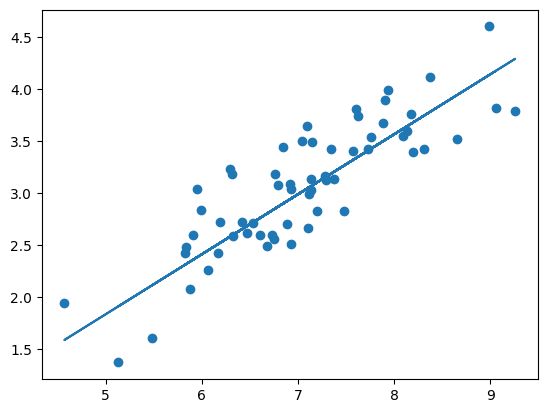

In [56]:
import matplotlib.pyplot as plt
plt.scatter(xtest,ytest)
plt.plot(xtest,lr.predict(xtest))
plt.show()